In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import PCA

In [2]:
#1 part
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(matrix)
eigenvalues, eigenvectors = np.linalg.eig(matrix)
print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: \n", eigenvectors)


[[1 2 3]
 [4 5 6]
 [7 8 9]]
Eigenvalues:  [ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
Eigenvectors: 
 [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [3]:
for i in range(len(eigenvalues)):
    eigenvalue = eigenvalues[i]
    eigenvector = eigenvectors[:, i]
    # A * v і λ * v
    matrix_vector = np.dot(matrix, eigenvector)
    value_vector = eigenvalue * eigenvector
    if np.allclose(matrix_vector, value_vector):
        print(f"For eigenvalue {eigenvalue}: True")
    else:
        print(f"For eigenvalue {eigenvalue}: False")

For eigenvalue 16.116843969807043: True
For eigenvalue -1.1168439698070427: True
For eigenvalue -1.3036777264747022e-15: True


(1280, 960, 3)


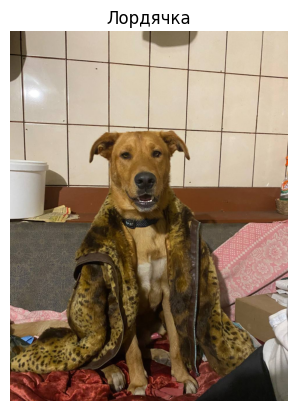

In [4]:
#2 part
initial_image = imread("photo_2024-06-16_10-01-07.jpg")
print(initial_image.shape)

plt.imshow(initial_image)
plt.axis('off')
plt.title('Лордячка')
plt.show()

(1280, 960)
1.0


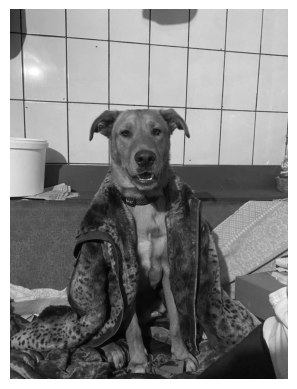

In [5]:
image_sum = initial_image.sum(axis=2)
print(image_sum.shape)
image_bw = image_sum/image_sum.max()
print(image_bw.max())
plt.imshow(image_bw, cmap='gray')
plt.axis('off')
plt.show()



 [0.64654396 0.72277865 0.78464319 0.81512129 0.83982972 0.86048781
 0.87517362 0.88510439 0.89375466 0.9018871  0.90807377 0.91299438
 0.91762911 0.92169071 0.92549012 0.92894164 0.93230984 0.93541019
 0.93796675 0.94032615 0.94254653 0.94473514 0.94661318 0.94844701
 0.95010989 0.95167314 0.95318325 0.95461158 0.95595415 0.95723481
 0.95841032 0.95955673 0.96064689 0.96170372 0.96271712 0.96371552
 0.96464293 0.96552535 0.96638978 0.96722612 0.96800742 0.96876719
 0.96948698 0.97017855 0.9708529  0.9714937  0.97211144 0.9726973
 0.97326837 0.9738119  0.97434962 0.97486533 0.97536583 0.97583749
 0.97630532 0.97676591 0.97719957 0.97762676 0.97803707 0.97844234
 0.97883913 0.97922433 0.97960284 0.97995912 0.98030913 0.98065098
 0.98098728 0.98130772 0.98162521 0.98193416 0.98223157 0.98251912
 0.98280338 0.98307714 0.98334241 0.98360197 0.98385574 0.9841038
 0.98434484 0.98458141 0.98481473 0.98504234 0.98526598 0.98548583
 0.98569925 0.98590264 0.98610499 0.98630502 0.98650419 0.9866

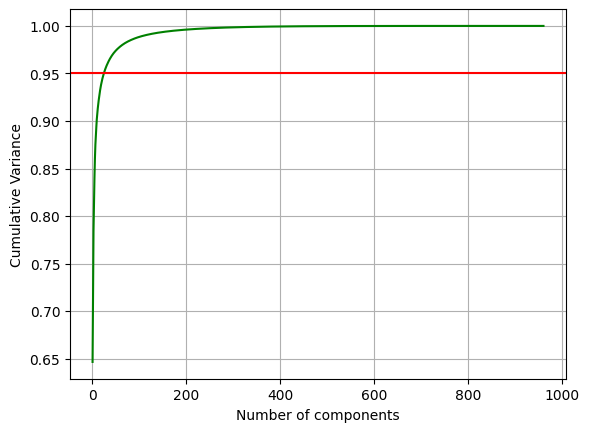

In [18]:
pca = PCA()
pca.fit(image_bw)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("\n", cumulative_variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to achieve 95% dispersion:{num_components}")


plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, color='g')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

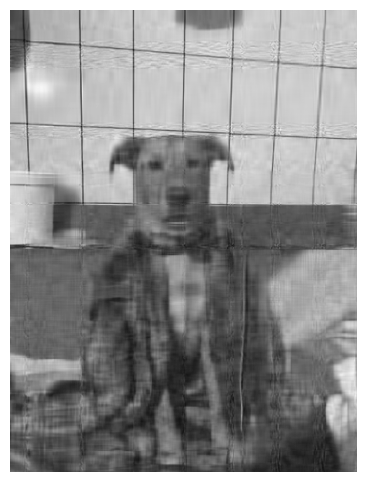

In [19]:
pca = PCA(n_components=num_components)
image_bw_reduced = pca.fit_transform(image_bw)
image_bw_reconstructed = pca.inverse_transform(image_bw_reduced)

plt.figure(figsize=(8, 6))
plt.imshow(image_bw_reconstructed, cmap='gray')
plt.axis('off')
plt.show()

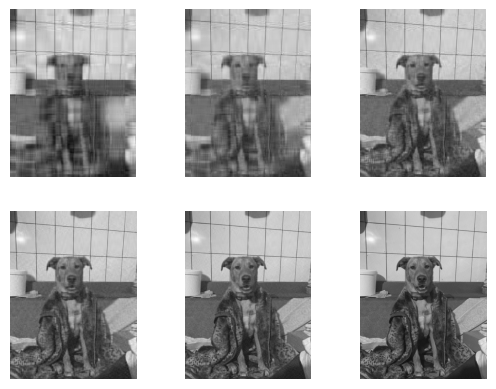

In [40]:
#5 порівняння графіків з різною кількістю компонент
num_components_list = [10, 15, 30, 50, 80, 150]
for i, num_components in enumerate(num_components_list):
    pca = PCA(n_components=num_components)
    image_bw_reduced = pca.fit_transform(image_bw)
    image_bw_reconstructed = pca.inverse_transform(image_bw_reduced)
    plt.subplot(2, 3, i + 1)
    plt.imshow(image_bw_reconstructed, cmap='gray')
    plt.axis('off')
plt.show()
# не можу додавати назву, бо відображаються неприроднім кольором картинки, пофіксити не вийшло 